In [5]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN


iris = load_iris()

In [2]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K Means

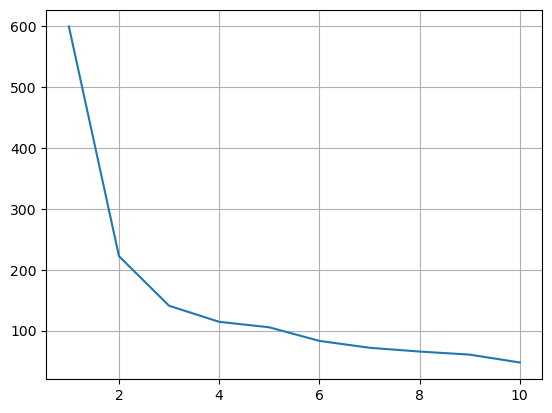

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.grid(True)




In [8]:
km = KMeans(n_clusters=3)
km_labels = km.fit_predict(X_scaled)


In [9]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X_scaled,km_labels))

0.4565352255831263


<Axes: xlabel='p1', ylabel='p2'>

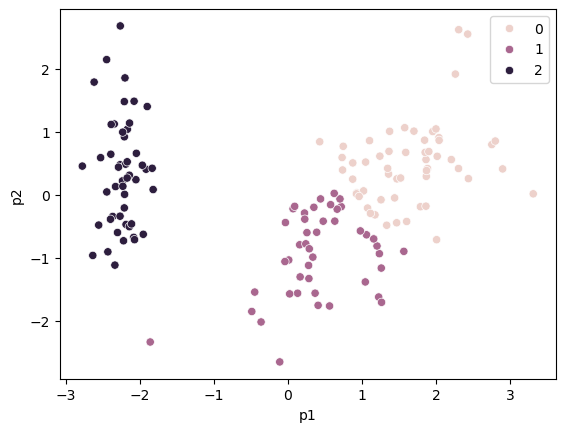

In [11]:
from sklearn.decomposition import PCA

x_pca = PCA(n_components=2).fit_transform(X_scaled)
x_pca = pd.DataFrame(x_pca,columns=['p1','p2'])

sns.scatterplot(data=x_pca,x='p1',y='p2',hue=km_labels)

# Hierarchial

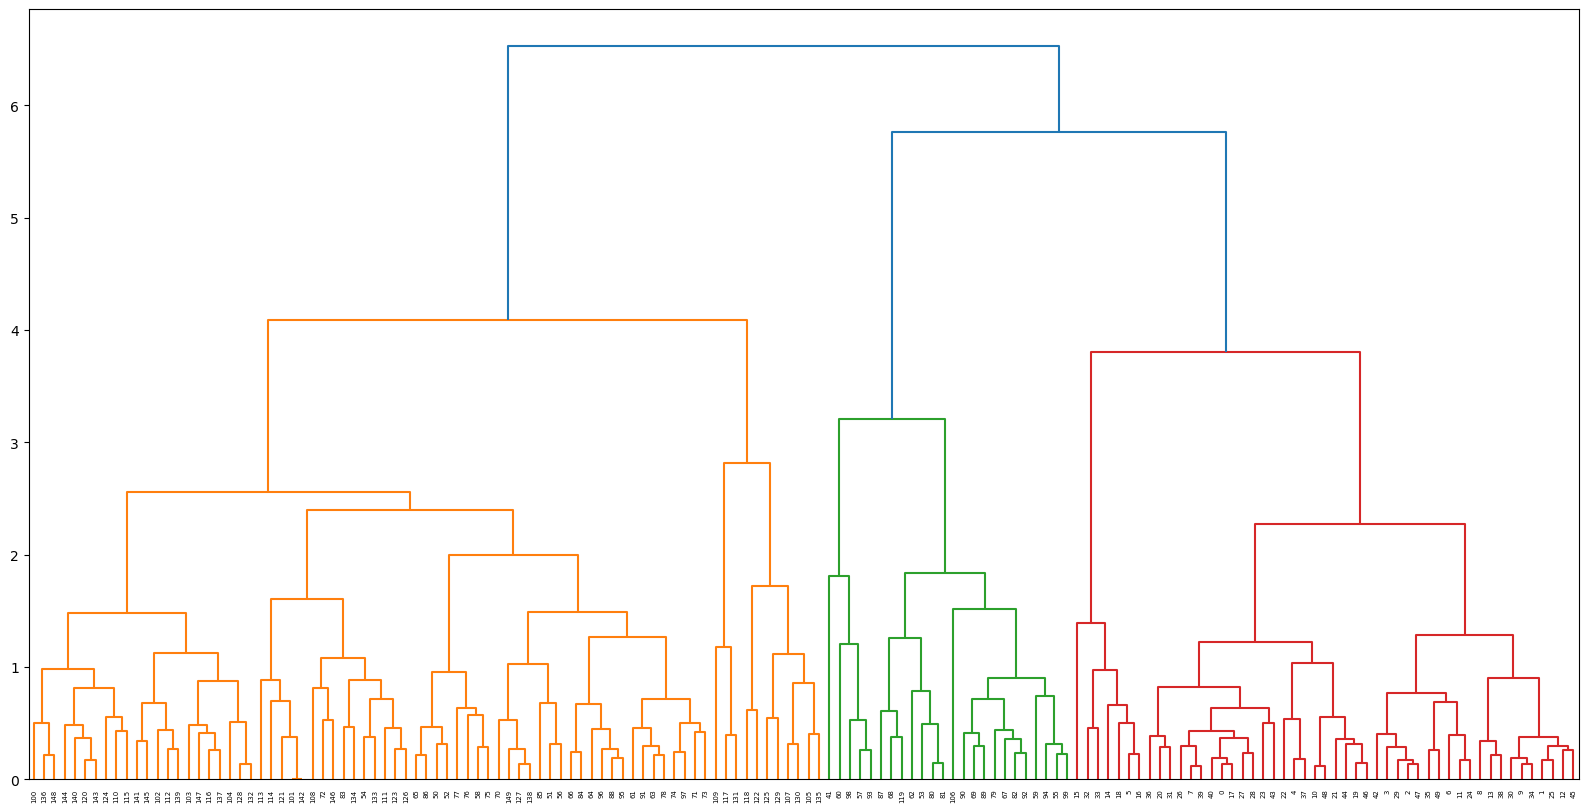

In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage

link = linkage(X_scaled,method='complete')
plt.figure(figsize=(20,10))
dendrogram(link)
plt.show()

In [ ]:
agl = AgglomerativeClustering(n_clusters=3)
ag_lab = agl.fit_predict(X_scaled)



In [22]:
print(silhouette_score(X_scaled,ag_lab))

0.4466890410285909


<Axes: xlabel='p1', ylabel='p2'>

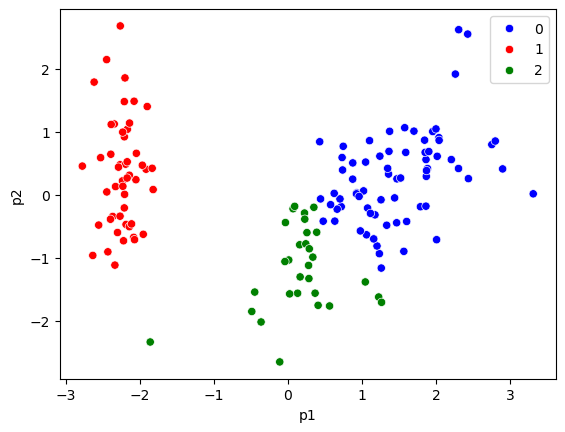

In [29]:
sns.scatterplot(data=x_pca,x='p1',y='p2',hue=ag_lab,palette=['blue','red','green'])

In [27]:
dbs = DBSCAN(eps=0.8)
dbs_labels = dbs.fit_predict(X_scaled)
print(silhouette_score(X_scaled,dbs_labels))

0.5216965052515835


<Axes: xlabel='p1', ylabel='p2'>

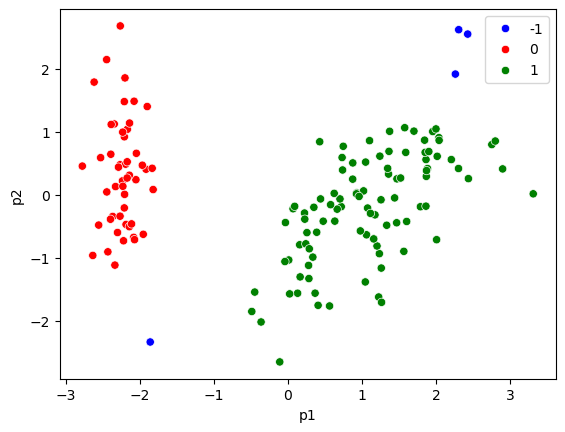

In [30]:
sns.scatterplot(data=x_pca,x='p1',y='p2',hue=dbs_labels,palette=['blue','red','green'])

In [ ]:
from sklearn.metrics import silhouette_score

def evaluate(name, labels):
    print(name)
    score = silhouette_score(X_scaled, labels)
    print(f"  - Silhouette Score: {score:.3f}")
    print()

evaluate("K-Means", km_labels)
evaluate("Agglomerative", ag_lab)
evaluate("DBSCAN", dbs_labels)


K-Means
  - Silhouette Score: 0.505

Agglomerative
  - Silhouette Score: 0.493

DBSCAN
  - Silhouette Score: 0.558



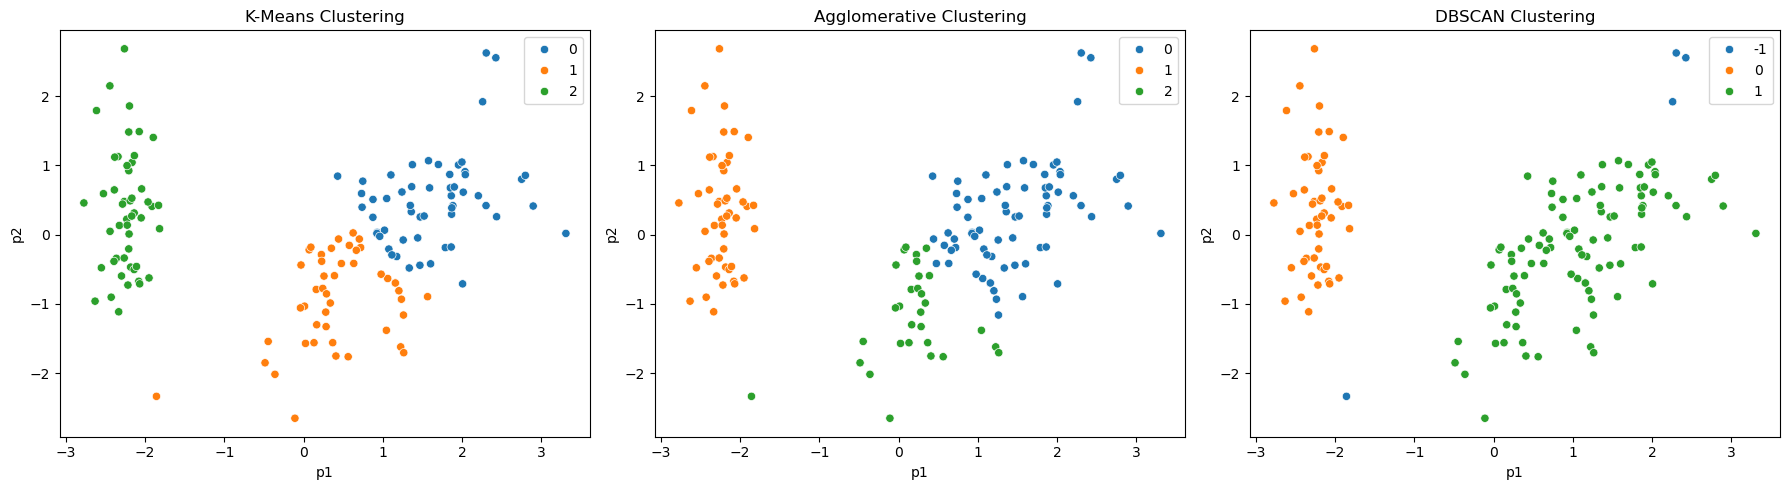

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
palette = 'tab10'

sns.scatterplot(data=x_pca,x='p1',y='p2',hue=km_labels, palette=palette, ax=axes[0])
axes[0].set_title("K-Means Clustering")

sns.scatterplot(data=x_pca,x='p1',y='p2',hue=ag_lab, palette=palette, ax=axes[1])
axes[1].set_title("Agglomerative Clustering")

sns.scatterplot(data=x_pca,x='p1',y='p2',hue=dbs_labels, palette=palette, ax=axes[2])
axes[2].set_title("DBSCAN Clustering")

plt.tight_layout()
plt.show()
